# Connect crashes with libraries

of the sampled crashes

## Analysis

In [7]:
import pandas as pd
import utils.config as config
import numpy as np

df_mlerr_labels = pd.read_excel(config.path_default.joinpath('Manual_labeing/libraries/df_err_processed_pregroup_sampled4_resampled7.xlsx'),
                                sheet_name = "Del-All(resampled-libs_cause)",
                                keep_default_na=False)

C:\Users\yirwa29\AppData\Local\anaconda3\envs\chatgpt\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [8]:
df_mlerr_labels_mllibs = df_mlerr_labels[df_mlerr_labels.label_if_ML_bug.isin(config.label_if_ML_bug["ML bug"])]
df_mlerr_labels_mllibs = df_mlerr_labels[~df_mlerr_labels.label_root_cause.isin(config.label_root_cause["NB specific"]+
                                  ["module not installed", "change of environment", "file/path not found or exist", "external control (window closed)", "settings(permission, environment)"]+
                                  ["did not import", "undefined variable", "undefined function", "typo"])]
df_mlerr_labels_mllibs = df_mlerr_labels[(df_mlerr_labels["Libs-cause"]!="None")]

In [9]:
print("The percentage of crashes caused by using ML libraries: ", df_mlerr_labels_mllibs.shape[0]/df_mlerr_labels.shape[0])
print("Top libraries that lead to crashes:")
pd.DataFrame(df_mlerr_labels_mllibs["Libs-cause"].value_counts()[:10]/df_mlerr_labels_mllibs.shape[0])

The percentage of crashes caused by using ML libraries:  0.4584450402144772
Top libraries that lead to crashes:


,count
Libs-cause,
pandas,0.195906
sklearn,0.146199
torch,0.108187
numpy,0.096491
keras,0.090643
tensorflow,0.078947
matplotlib,0.049708
seaborn,0.038012
cv2,0.017544


In [10]:
df_mlerr_labels_gh = df_mlerr_labels[(df_mlerr_labels["nb_source"]==config.NB_SOURCE["github"])]
df_mlerr_labels_mllibs_gh = df_mlerr_labels_mllibs[(df_mlerr_labels_mllibs["nb_source"]==config.NB_SOURCE["github"])]
print("The percentage of GH crashes caused by using ML libraries: ", df_mlerr_labels_mllibs_gh.shape[0]/df_mlerr_labels_gh.shape[0])
print("Top libraries that lead to crashes for GH notebooks:")
pd.DataFrame(df_mlerr_labels_mllibs_gh["Libs-cause"].value_counts()[:10]/df_mlerr_labels_mllibs_gh.shape[0])

The percentage of GH crashes caused by using ML libraries:  0.4205128205128205
Top libraries that lead to crashes for GH notebooks:


,count
Libs-cause,
pandas,0.195122
numpy,0.128049
sklearn,0.128049
torch,0.115854
tensorflow,0.109756
matplotlib,0.060976
seaborn,0.042683
keras,0.036585
cv2,0.024390


In [11]:
df_mlerr_labels_k = df_mlerr_labels[(df_mlerr_labels["nb_source"]==config.NB_SOURCE["kaggle"])]
df_mlerr_labels_mllibs_k = df_mlerr_labels_mllibs[(df_mlerr_labels_mllibs["nb_source"]==config.NB_SOURCE["kaggle"])]
print("The percentage of Kaggle crashes caused by using ML libraries: ", df_mlerr_labels_mllibs_k.shape[0]/df_mlerr_labels_k.shape[0])
print("Top libraries that lead to crashes for Kaggle notebooks:")
pd.DataFrame(df_mlerr_labels_mllibs_k["Libs-cause"].value_counts()[:10]/df_mlerr_labels_mllibs_k.shape[0])

The percentage of Kaggle crashes caused by using ML libraries:  0.5
Top libraries that lead to crashes for Kaggle notebooks:


,count
Libs-cause,
pandas,0.196629
sklearn,0.162921
keras,0.140449
torch,0.101124
numpy,0.067416
tensorflow,0.050562
matplotlib,0.039326
seaborn,0.033708
statsmodels,0.016854


In [12]:
# Plot together with library usage frequency, ML API misuse, other root causes
df_mllibs_frequency = pd.read_excel(config.path_default.joinpath('Kaggle/ml_library/nb_imports_popular_libs_manual_labeled.xlsx'),
                                    sheet_name = "Yiran", keep_default_na=False)
df_mllibs_frequency = df_mllibs_frequency[df_mllibs_frequency.imports.isin(config.top_lib_names)][["imports","count"]].reindex()
df_mllibs_frequency["count"] = df_mllibs_frequency["count"].astype(int)
df_mllibs_frequency["frequency"] = df_mllibs_frequency["count"]/sum(df_mllibs_frequency["count"])

In [13]:
df_mllibs_cause = pd.DataFrame(df_mlerr_labels_mllibs_gh["Libs-cause"].value_counts())
df_mllibs_cause = df_mllibs_cause[df_mllibs_cause.index.isin(config.top_lib_names)]

In [14]:
df_mllibs_frequency = df_mllibs_frequency[df_mllibs_frequency.imports.isin(df_mllibs_cause.index)]
df_mllibs_cause = df_mllibs_cause.reindex(df_mllibs_frequency.imports)
df_mllibs_cause["Crash percentage"] = df_mllibs_cause["count"]/sum(df_mllibs_cause["count"])
df_mllibs_cause["Usage frequency"] = df_mllibs_frequency["frequency"].values

In [15]:
df_mllibs_cause["ratio"] = df_mllibs_cause["Crash percentage"]/df_mllibs_cause["Usage frequency"]
df_mllibs_cause = df_mllibs_cause.sort_values(by='ratio', ascending=False)

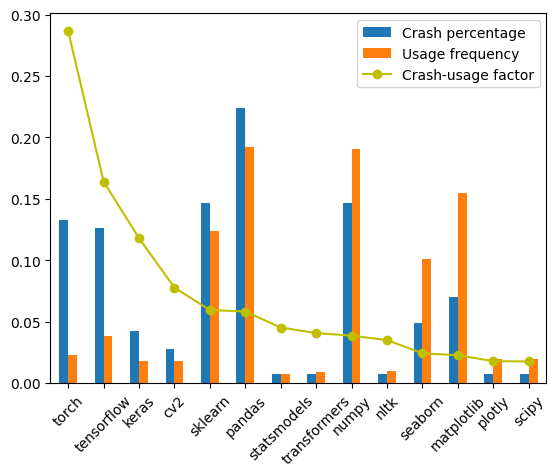

In [29]:
import matplotlib.pyplot as plt

df_mllibs_cause["Crash-usage factor"] = df_mllibs_cause["ratio"]/20 # normalized ratio
ax = df_mllibs_cause.plot(y=["Crash percentage", "Usage frequency"], kind="bar", rot=45)
df_mllibs_cause.plot(y=['Crash-usage factor'], linestyle='-', marker='o', ax=ax, color='y', rot=45)
ax.set_xlabel('')
plt.show()